In [15]:
import os
print(os.getcwd())

path = os.chdir('E:/TIMA/VenturaBasinTiMA_Output')

print(os.getcwd())

E:\TIMA\VenturaBasinTiMA_Output
E:\TIMA\VenturaBasinTiMA_Output


# Import neccessary Python libraries

[python-ternary library introduction](https://github.com/marcharper/python-ternary)

In [16]:
# basic libraries
import pandas as pd
import numpy as np
import tqdm

# image processing libraries
import imageio
import cv2
import imutils
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import visvis as vv

# plotting libraries
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import ternary #correct library is python-ternary

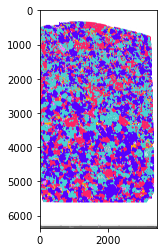

(<matplotlib.image.AxesImage at 0x1fb8ea8e608>, None)

In [17]:
%matplotlib inline
# !pip install opencv-python

img_path = r'E:/TIMA/VenturaBasinTiMA_Output/False_Color_Images_Thin_Sections/CC-17-GR_panorama_Legend_ThinSection.png'

img = imageio.imread(img_path)

# print(img.shape)
# vv.imshow(img)

plt.imshow(img), plt.show()

# 2 Data Visualization


#### 2.1 Mineral Associations Modal Abundances

- possibility of each mineral associated with selected mineral

The difference between modal abundances data and percentage grain per phase data is relatively small.


In [18]:
mineral_assoc_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_associations_modal abundances.csv'
mineral_associations = pd.read_csv(mineral_assoc_path)
print(mineral_associations.shape)
mineral_associations = mineral_associations.replace(r'----', np.nan)
# mineral_associations.iloc[1,1:].apply(pd.to_numeric)
mineral_associations
# max_value = mineral_assoc.idxmax(axis=1)
# max_value

(594, 31)


,Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Other Minerals,[Unclassified],Biotite-Ti,Clinochlore,Ankerite+clay
0,CC-17-1 - Liberation analysis #1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Quartz,NaN,19.90,23.55,12.12,18.56,20.57,20.03,24.25,3.58,...,0.00,10.13,8.08,3.37,5.60,25.23,8.51,11.91,0.00,100.00
2,Plagioclase,12.14,NaN,39.15,8.40,5.03,1.96,1.60,0.00,5.18,...,0.00,8.70,8.78,3.21,66.82,0.00,3.23,3.10,0.00,0.00
3,Orthoclase,13.15,22.36,NaN,7.62,5.08,2.85,1.85,0.88,0.45,...,0.00,0.00,4.48,0.00,0.78,0.00,2.04,2.85,0.00,0.00
4,Muscovite,0.96,17.10,3.17,NaN,10.63,19.61,0.00,0.66,0.00,...,0.00,0.81,2.66,0.00,6.79,0.00,1.11,1.85,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Clinochlore,0.01,0.00,0.00,2.98,0.01,0.21,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.16,0.00,0.02,0.00,NaN,0.00
590,Ankerite+clay,0.06,0.00,0.00,0.00,0.01,0.06,0.00,0.88,0.07,...,3.14,0.00,0.00,0.00,0.00,0.00,0.48,0.28,0.00,NaN
591,[Unclassified],4.31,6.21,1.27,1.01,1.37,13.89,4.82,2.27,19.09,...,7.25,18.89,46.47,0.75,1.24,0.00,NaN,2.86,20.20,29.06
592,Free particles,44.97,12.56,30.77,2.61,5.27,23.45,71.14,2.53,30.28,...,3.66,4.14,12.20,62.69,5.21,17.78,21.20,10.48,4.04,0.25


In [19]:
# noinspection JupyterKernel
row_break = 33 # every sample only have 33 rows of data include sample name， slice 33 rows
mineral_assoc = pd.DataFrame(columns=['Sample ID', 'Mineral Name', 'Most Associated Mineral', 'Modal Abundances'])
for i in tqdm.trange(18):
    for j in range(1, row_break): # check every row in one sample
        associated_min = pd.to_numeric(mineral_associations.iloc[i*row_break+j, 1:]).sort_values(ascending=False)
        most_assoc_min = associated_min[0]
        most_assoc_name = associated_min.index[0]
        mineral_assoc=mineral_assoc.append({'Sample ID': mineral_associations.iloc[i*row_break, 0], 
                              'Mineral Name': mineral_associations.iloc[i*row_break+j, 0],
                              'Most Associated Mineral': most_assoc_name,
                              'Modal Abundances': most_assoc_min}, ignore_index=True)
mineral_assoc.tail()

# argmax() get column name 
# use legend  as one column, paired [] minerals as second/third column?

100%|██████████| 18/18 [00:02<00:00,  7.95it/s]


,Sample ID,Mineral Name,Most Associated Mineral,Modal Abundances
571,MN-17-11 - Liberation analysis #1,Clinochlore,Muscovite,2.98
572,MN-17-11 - Liberation analysis #1,Ankerite+clay,Sulfates,3.14
573,MN-17-11 - Liberation analysis #1,[Unclassified],Other REE Minerals,46.47
574,MN-17-11 - Liberation analysis #1,Free particles,Apatite,71.14
575,MN-17-11 - Liberation analysis #1,Total,Ankerite+clay,100.00


#### 2.2 Mineral Properties Modal Abundances

In [20]:
########################################################################
# read and pre-process mineral properties csv for each sample analyzed #
########################################################################

mineral_prop_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_properties_modal_abundances.csv'
mineral_properties = pd.read_csv(mineral_prop_path)

# drop the first row (thin section #/name)

mineral_prop = mineral_properties.copy()[1:].T # transpose the dataframe for subsequent analysis.
mineral_prop.columns = mineral_prop.iloc[0] # use legend as column names
mineral_prop=mineral_prop.tail(-1) # drop the legend row since it is column name now
mineral_prop = mineral_prop.apply(pd.to_numeric) # because some numbers are in string type
mineral_prop['Feldspar'] = mineral_prop['Plagioclase']+mineral_prop['Orthoclase'] # feldspar sum up

# display to check
mineral_prop

Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,Epidote,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Clinochlore,Ankerite+clay,[Unclassified],Total,Feldspar
CCR-18-1_Grain_Mount,7.9,6.0,2.8,0.1,0.5,0.3,3.7,3.4,7.1,13.7,...,0.0,0.0,0.9,0.0,0.0,0.0,0.2,0.3,100.0,8.8
MN16-03_Thin_Section,38.5,29.1,24.1,0.5,0.8,0.0,4.4,0.2,0.1,0.0,...,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.8,100.0,53.2
MN16-04_Thin_Section,38.9,32.6,20.8,1.6,3.1,0.1,0.2,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.8,100.0,53.4
MN-16-04_Grain_Mount,5.8,2.9,1.1,0.7,2.3,2.5,11.0,0.0,8.4,0.2,...,0.2,0.0,1.1,0.0,0.0,0.0,0.0,0.3,100.0,4.0
EDF17-1_Thin_Section,38.7,28.6,24.5,0.9,2.6,0.0,0.2,0.3,0.1,0.0,...,0.0,0.0,0.0,0.0,2.4,0.0,0.0,1.0,100.0,53.1
EDF-17-1_Grain_Mount,17.0,7.1,6.7,0.7,1.1,1.6,31.7,0.0,11.4,0.1,...,0.0,0.0,1.2,0.0,0.3,0.0,0.0,0.5,100.0,13.8
MN17-11_Thin_Section,40.9,28.2,20.2,1.9,2.8,0.1,0.0,1.0,0.4,0.0,...,0.1,0.3,0.0,0.0,1.5,0.0,0.0,1.3,100.0,48.4
MN-17-11_Grain_Mount,2.3,0.9,0.7,0.2,0.7,1.2,0.5,0.0,3.5,0.4,...,0.0,0.0,0.5,0.0,0.0,0.0,0.1,0.2,100.0,1.6
MN-16-05_Thin_Section,3.4,9.9,1.2,0.4,0.9,0.6,4.6,2.1,3.6,33.1,...,0.0,0.0,0.1,0.0,0.1,0.2,0.1,1.0,100.0,11.1
MN16-05_Grain_Mount,12.9,58.9,10.2,0.9,3.0,0.4,0.5,7.5,0.2,2.3,...,0.0,0.1,0.0,0.0,0.2,0.2,0.0,0.9,100.0,69.1


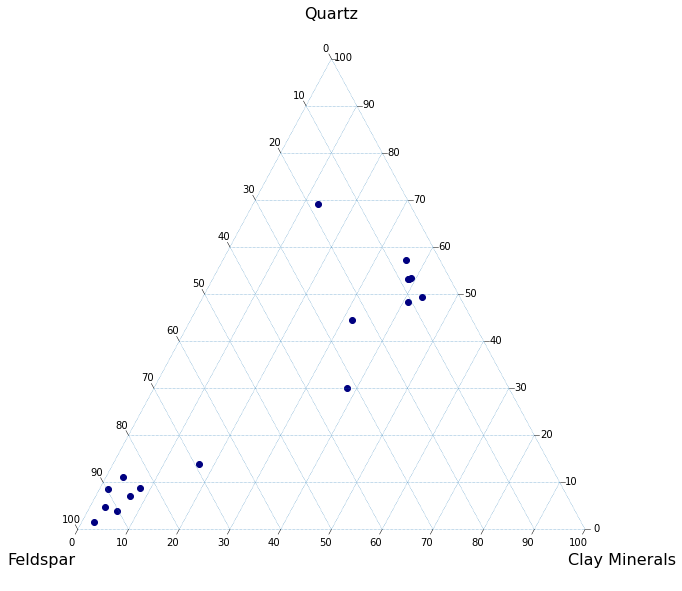

In [21]:
cols = ['Quartz', 'Feldspar', 'Clay Minerals'] # columns selected
fontsize = 16
###################################
## Ternary diagram
###################################
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 10)

tax.scatter(mineral_prop[cols].values, color='navy')


tax.gridlines(multiple=10) # tick interval
tax.get_axes().axis('off')
tax.ticks(axis='lbr', multiple=10, linewidth=0.5, offset=0.01, fontsize=10)
tax.right_corner_label("Clay Minerals", fontsize=fontsize)
tax.top_corner_label("Quartz", fontsize=fontsize)
tax.left_corner_label("Feldspar", fontsize=fontsize)

# 3 Image Processing

- Process grain_mounts, grain_mounts_small, and grain_mounts_particles images

#### 3.1 Pre-process thin section images
- Read and crop image (remove scalebar and leave particles only)

C:\Users\Administrator\Anaconda3\envs\python-3.7\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


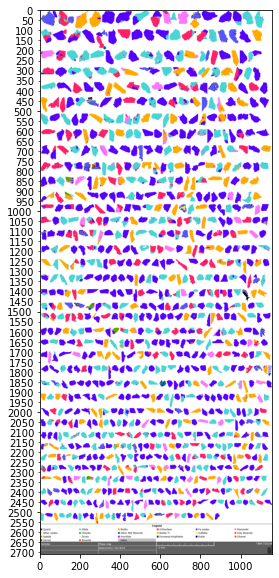

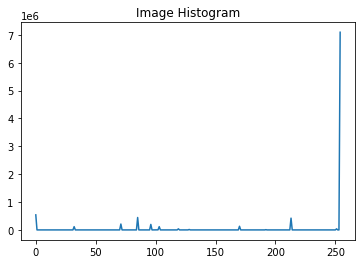

In [22]:
%matplotlib inline
# !pip install opencv-python

img_path = r'E:/TIMA/VenturaBasinTiMA_Output/GrainMount_Particles/CC-17-1_GrainMount_particles.png'

img = imageio.imread(img_path)

# print(img.shape)
# vv.imshow(img)
fig = plt.figure(figsize=(50,10))
plt.axes().yaxis.set_minor_locator(MultipleLocator(50))
plt.axes().yaxis.set_minor_formatter(FormatStrFormatter("%d"))
plt.imshow(img), plt.show()

#Show histogram
values, bins = np.histogram(img, bins=np.arange(256))
plt.figure()
plt.plot(bins[:-1], values)
plt.title("Image Histogram")
plt.show()

C:\Users\Administrator\Anaconda3\envs\python-3.7\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


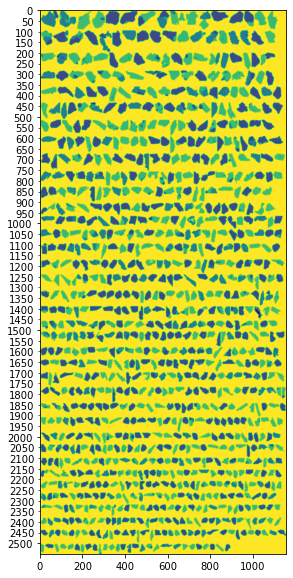

(<matplotlib.image.AxesImage at 0x1fb8ccc0fc8>, None)

In [23]:
# clip the image to leave particles only
crop_color_img = img[0:2550, :]
gray_img = cv2.imread(img_path,0)
crop_img = gray_img[0:2550, :]
crop_img = cv2.GaussianBlur(crop_img, (7, 7), 0) # blur slightly
# gray = cv2.cvtColor(crop_img, cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(50,10))
plt.axes().yaxis.set_minor_locator(MultipleLocator(50))
plt.axes().yaxis.set_minor_formatter(FormatStrFormatter("%d"))
plt.imshow(crop_img), plt.show()


# (thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#
# plt.imshow('Black white image', blackAndWhiteImage)
# # cv2.imshow('Original image',crop_img)
# # cv2.imshow('Gray image', gray)
#
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### 3.2 Find Grain Shapes and Computing Shape Roundness/Angularity
- Find area and perimeter of particles

    [cv2 contours docs](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html)
    
    [Canny edge detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)
    
    [Measure the size of objects docs](https://www.pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/)

- Use ratio = 4 * pi * Area / ( Perimeter^2) to calculate roundness

    [The roundness formula comes from here](https://stackoverflow.com/questions/29814229/how-to-calculate-the-value-of-the-roundness-shape-feature-of-an-image-contour)

- Use visual grain roudness chart and compute the roundness ratio as a reference:
    e.g. [sediment grain roundness](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FA-new-roundness-scale-for-sedimentary-particles-after-Powers_fig4_303702743&psig=AOvVaw0BvbTjj7J5p25u__FamIQL&ust=1588690925747000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMiHxYS9mukCFQAAAAAdAAAAABAI);
    [fieldwork reference chart](https://www.google.com/url?sa=i&url=https%3A%2F%2Flink.springer.com%2Fchapter%2F10.1007%2F978-3-319-30232-4_3&psig=AOvVaw0BvbTjj7J5p25u__FamIQL&ust=1588690925747000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMiHxYS9mukCFQAAAAAdAAAAABAS)

In [24]:
# functions defined
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

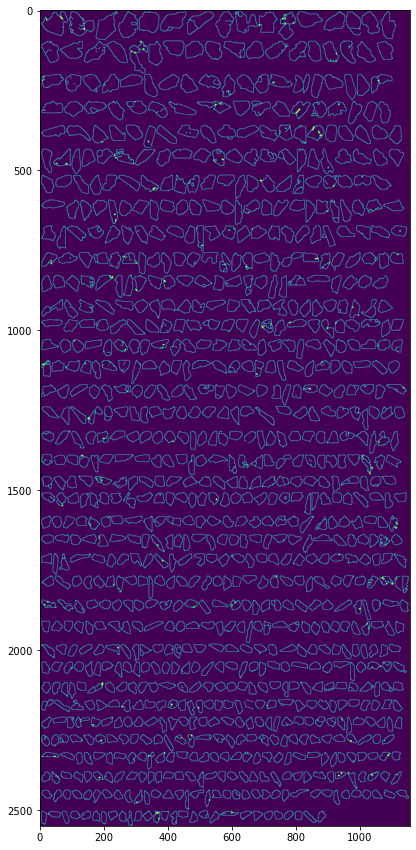

(<matplotlib.image.AxesImage at 0x1fb8d67e608>, None)

In [25]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

edged = cv2.Canny(crop_img, 150, 180) # min and max seems the best for this image
edged = cv2.dilate(edged, None, iterations=1) #1 or 2 iterations seems better
edged = cv2.erode(edged, None, iterations=1)
# remove the imperfect dots within the outlines of particles
kernel = np.ones((2,2),np.uint8)
edged = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
# plot figure to check
fig = plt.figure(figsize=(60,15))
plt.imshow(edged), plt.show()

In [26]:
# find contours in the edge map
# find bounding box 4 points
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
# pixelsPerMetric = None

particle_area = pd.DataFrame(columns=['Bounding Box',
                                      'Pixel_Area',
                                      'Pixel_Perimeter',
                                      'Roundness Ratio'])

#####################################
## Find area and perimeter of particles ##
#####################################

# loop over the contours individually
for c in tqdm.tqdm(cnts):
# if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 10:
        continue
# compute perimeter of the contour
    peri = cv2.arcLength(c, True)
# approx = cv2.approxPolyDP(c,0.001*peri,True)
# compute the rotated bounding box of the contour
    orig = crop_color_img.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

# unpack the ordered bounding box, then compute the midpoint
# between the top-left and top-right coordinates, followed by
# the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

# compute the midpoint between the top-left and top-right points,
# followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    roundness = 4 * np.pi * (dA*dB) / ( peri**2)
    particle_area = particle_area.append({'Bounding Box': c,
                                          'Pixel_Area': dA*dB,
                                          'Pixel_Perimeter': peri,
                                          'Roundness Ratio': roundness}, ignore_index=True)


100%|██████████| 1025/1025 [00:09<00:00, 112.29it/s]


In [27]:
# display the dataframe of particle roundness
particle_area.head()

,Bounding Box,Pixel_Area,Pixel_Perimeter,Roundness Ratio
0,"[[[5, 2503]], [[5, 2507]], [[4, 2508]], [[4, 2...",615.000000,102.627417,0.733767
1,"[[[30, 2155]], [[29, 2156]], [[26, 2156]], [[2...",1081.777241,128.669047,0.821107
2,"[[[27, 1581]], [[25, 1583]], [[24, 1583]], [[2...",1059.174944,114.911687,1.007974
3,"[[[27, 757]], [[26, 758]], [[23, 758]], [[16, ...",1807.516615,168.994949,0.795325
4,"[[[7, 516]], [[7, 520]], [[5, 522]], [[5, 526]...",2041.432095,310.492421,0.266099


In [28]:
# # https://drive.google.com/drive/folders/1X0IK45IXxDBqPuxKQUqOQp-5BeLDu9zw
# from cv2 import imread, morphologyEx
# from skimage import data, io, filters, feature
# import numpy as np
# import matplotlib.pyplot as plt
# # Label image regions.
# from skimage.measure import regionprops
# import matplotlib.patches as mpatches
# from skimage.morphology import label
#
# imgPath = 'C:/Users/Amirber/Documents/pm25/farc_snd6_(c6).jpg'
# # Insert a um to pixel conversion ratio
# um2pxratio = 1
# image = imread(imgPath,0)# data.coins()  # or any NumPy array!
# #remove the 2 um scake
# image = image[:800,:]
# #Whoe image
# io.imshow(image)
#
# #Show histogram
# values, bins = np.histogram(image,
#                             bins=np.arange(256))
# plt.figure()
# plt.plot(bins[:-1], values)
# plt.title("Image Histogram")
# plt.show()
#
# #Calculate Soble edges
# edges_sob = filters.sobel(image)
# io.imshow(edges_sob)
#
# #Show histogram of non-sero Sobel edges
# values, bins = np.histogram(np.nonzero(edges_sob) ,
#                             bins=np.arange(1000))
# plt.figure()
# plt.plot(bins[:-1], values)
# plt.title("Use Histogram to select thresholding value")
#
# #Using a threshold to binarize the images, condider replacing with an adaptice
# # criteria. raing the TH to 0.03 will remove the two tuching particles but will
# #cause larger oarticles to split.
# edges_sob_filtered = np.where(edges_sob>0.01,255,0)
# io.imshow(edges_sob_filtered)
#
#
# #Use lable on binnary Sobel edges to find shapes
# label_image = label(edges_sob_filtered)
# fig,ax = plt.subplots(1,figsize=(20,10))
# ax.imshow(image, cmap=plt.cm.gray)
# ax.set_title('Labeled items', fontsize=24)
# ax.axis('off')
#
# #Do not plot regions smaller thn 5 pixels on each axis
# sizeTh=4
#
# for region in regionprops(label_image):
#     # Draw rectangle around segmented coins.
#     minr, minc, maxr, maxc = region.bbox
#     rect = mpatches.Rectangle((minc, minr),
#                               maxc - minc,
#                               maxr - minr,
#                               fill=False,
#                               edgecolor='red',
#                               linewidth=2)
#     ax.add_patch(rect)
#
# #Sort all found shapes by region size
# sortRegions = [[(region.bbox[2]-region.bbox[0]) * (region.bbox[3] - region.bbox[1]),region.bbox]
#                 for region in regionprops(label_image) if
#                 ((region.bbox[2]-region.bbox[0])>sizeTh and (region.bbox[3] - region.bbox[1])>sizeTh)]
# sortRegions = sorted(sortRegions, reverse=True)
#
# #Check particle sizes distribution
# particleSize = [size[0] for size in sortRegions]
#
# #Show histogram of non-sero Sobel edges
# plt.figure()
# plt.plot(np.multiply(np.power(um2pxratio,2), particleSize),linewidth=2)
# plt.xlabel('Particle count',fontsize=14)
# plt.ylabel('Particle area',fontsize=14)
# plt.title("Particle area distribution",fontsize=16)
# #Show 5 largest regions location, image and edge
# for region in sortRegions[:5]:
#     # Draw rectangle around segmented coins.
#     minr, minc, maxr, maxc = region[1]
#     fig, ax = plt.subplots(1,3,figsize=(15,6))
#     ax[0].imshow(image, cmap=plt.cm.gray)
#     ax[0].set_title('full frame', fontsize=16)
#     ax[0].axis('off')
#     rect = mpatches.Rectangle((minc, minr),
#                           maxc - minc,
#                           maxr - minr,
#                           fill=False,
#                           edgecolor='red',
#                           linewidth=2)
#     ax[0].add_patch(rect)
#
#     ax[1].imshow(image[minr:maxr,minc:maxc],cmap='gray')
#     ax[1].set_title('Zoom view', fontsize=16)
#     ax[1].axis("off")
#     ax[1].plot([0.1*(maxc - minc), 0.3*(maxc - minc)],
#              [0.9*(maxr - minr),0.9*(maxr - minr)],'r')
#     ax[1].text(0.15*(maxc - minc), 0.87*(maxr - minr),
#           str(round(0.2*(maxc - minc)*um2pxratio,1))+'um',
#           color='red', fontsize=12, horizontalalignment='center')
#
#     ax[2].imshow(edges_sob_filtered[minr:maxr,minc:maxc],cmap='gray')
#     ax[2].set_title('Edge view', fontsize=16)
#     ax[2].axis("off")
#     plt.show()
#
# #Show 5 smallest regions location, image and edge
# for region in sortRegions[-5:]:
#     # Draw rectangle around segmented coins.
#     minr, minc, maxr, maxc = region[1]
#     fig, ax = plt.subplots(1,3,figsize=(15,6))
#     ax[0].imshow(image, cmap=plt.cm.gray)
#     ax[0].set_title('full frame', fontsize=16)
#     ax[0].axis('off')
#     rect = mpatches.Rectangle((minc, minr),
#                           maxc - minc,
#                           maxr - minr,
#                           fill=False,
#                           edgecolor='red',
#                           linewidth=2)
#     ax[0].add_patch(rect)
#
#     ax[1].imshow(image[minr:maxr,minc:maxc],cmap='gray')
#     ax[1].set_title('Zoom view', fontsize=16)
#     ax[1].axis("off")
#     ax[1].plot([0.1*(maxc - minc), 0.3*(maxc - minc)],
#              [0.9*(maxr - minr),0.9*(maxr - minr)],'r')
#     ax[1].text(0.15*(maxc - minc), 0.87*(maxr - minr),
#           str(round(0.2*(maxc - minc)*um2pxratio,1))+'um',
#           color='red', fontsize=12, horizontalalignment='center')
#
#     ax[2].imshow(edges_sob_filtered[minr:maxr,minc:maxc],cmap='gray')
#     ax[2].set_title('Edge view', fontsize=16)
#     ax[2].axis("off")
#     plt.show()